(launch:thebe)=

# Reconstruction: RBF

In [1]:
import numpy as np
from scipy.interpolate import RBFInterpolator
import matplotlib.pyplot as plt

Radial Basis Function

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RBFInterpolator.html

 $$\textbf{Model: } z = x^2 + y^2$$

First, we create a matrix for x and y, and apply the model above to obtain z

In [2]:
n_disc = 100 #Discretizations in x and y axis
xp, yp = np.meshgrid(np.linspace(0,1,n_disc), np.linspace(0,1,n_disc)) #Matrix
x, y = xp.reshape(-1), yp.reshape(-1) #Vectors
z = (x**2) + (y**2) #Vector
zp = np.reshape(z, np.shape(xp)) #Matrix

- Select a Random number of x, y and z values

- First we are going to make a test with a reduced number of values

In [3]:
n_random = 10 #Number of random values to choosse

In [4]:
random_i = np.random.randint(0, len(x), size=n_random)
xi = x[random_i]
yi = y[random_i]
zi = z[random_i]

Text(0.5, 0.92, 'Selected Points for RBF')

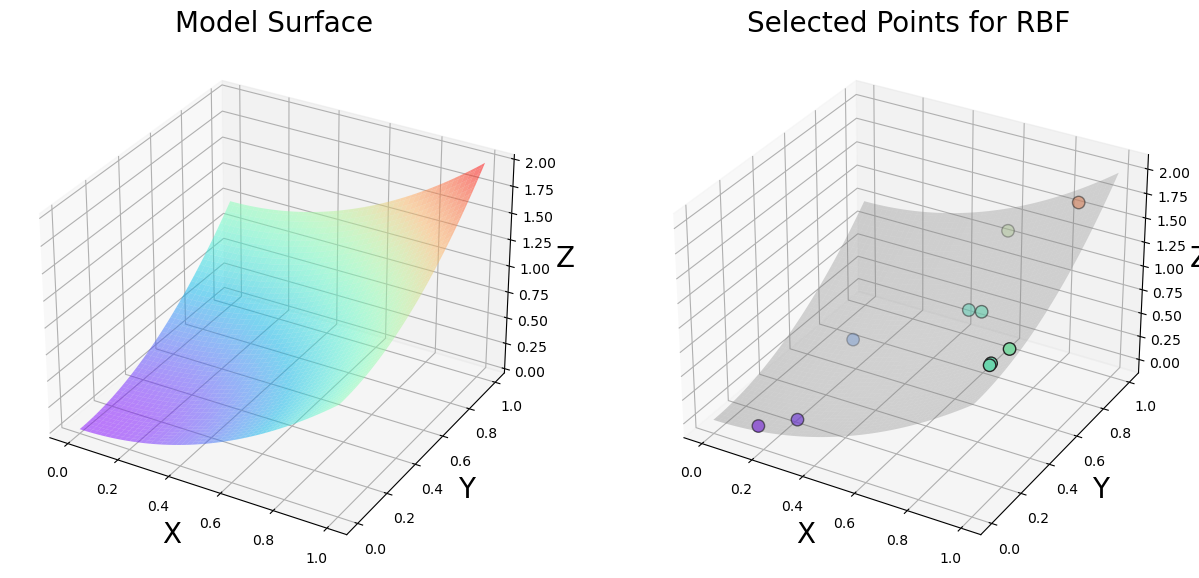

In [5]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xp,yp,zp,alpha=.5, cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('Model Surface', fontsize = 20)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xp, yp, zp, alpha=.3, color='grey')
#ax1.scatter(x,y,z, s=3, c='grey', alpha=.1, cmap = 'rainbow')
ax1.scatter(xi, yi, zi, s = 80, c= zi, vmin = z.min(), vmax = z.max(), edgecolor = 'black', zorder=3, cmap = 'rainbow')
ax1.set_xlabel('X', fontsize = 20)
ax1.set_ylabel('Y', fontsize = 20)
ax1.set_zlabel('Z', fontsize = 20)
ax1.set_title('Selected Points for RBF', fontsize = 20)


- 2D Plot of surface and selected points

Text(0, 0.5, 'Y')

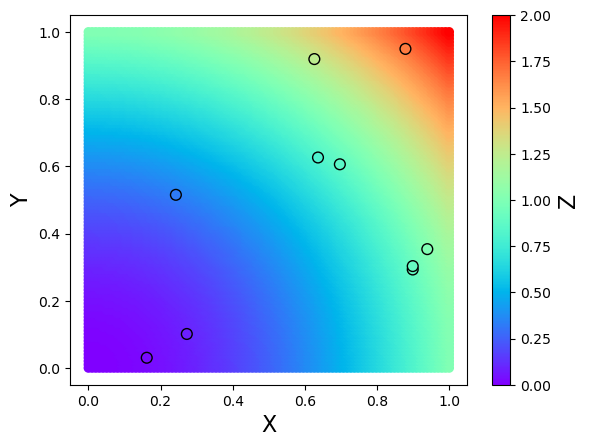

In [6]:
fig, ax = plt.subplots()
im = ax.scatter(x,y, c = z, vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
im1 = ax.scatter(xi, yi, s = 60, c= zi, vmin = z.min(), vmax = z.max(), 
                 edgecolor = 'black', cmap = 'rainbow')
plt.colorbar(im).set_label('Z', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('Y', fontsize = 16)

- Once we have selected the points, we fit the RBF function

In [7]:
rbf_func = RBFInterpolator(np.vstack((xi, yi)).T, zi)  # radial basis function interpolator instance

- With the RBF function (rbf_func) we obtain the results for all the combinations of x and y

In [8]:
results = rbf_func(np.vstack((x, y)).T)

- Once we have obtained the results we can plot the resulting surface

Text(0.5, 0.92, 'RBF resulting surface')

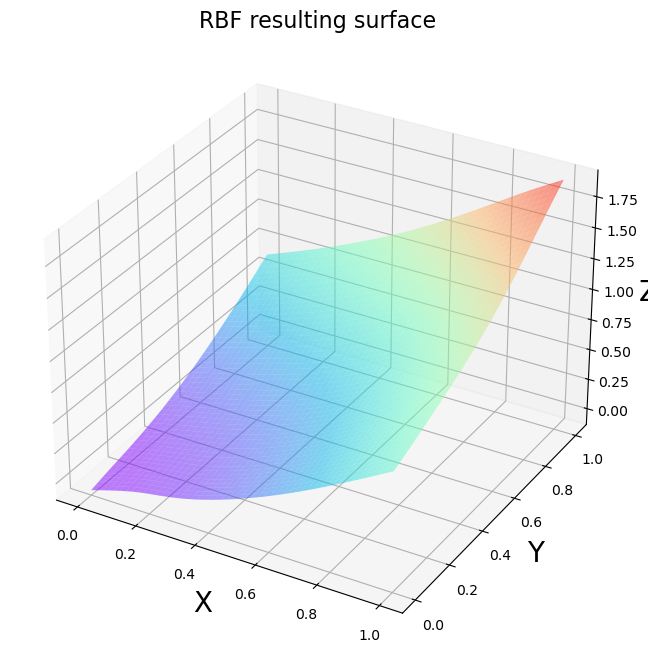

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xp, yp, np.reshape(results, np.shape(xp)), alpha=.5,
                vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('RBF resulting surface', fontsize = 16)

- We can also plot the errors over the surface

Text(0.5, 0, 'Z')

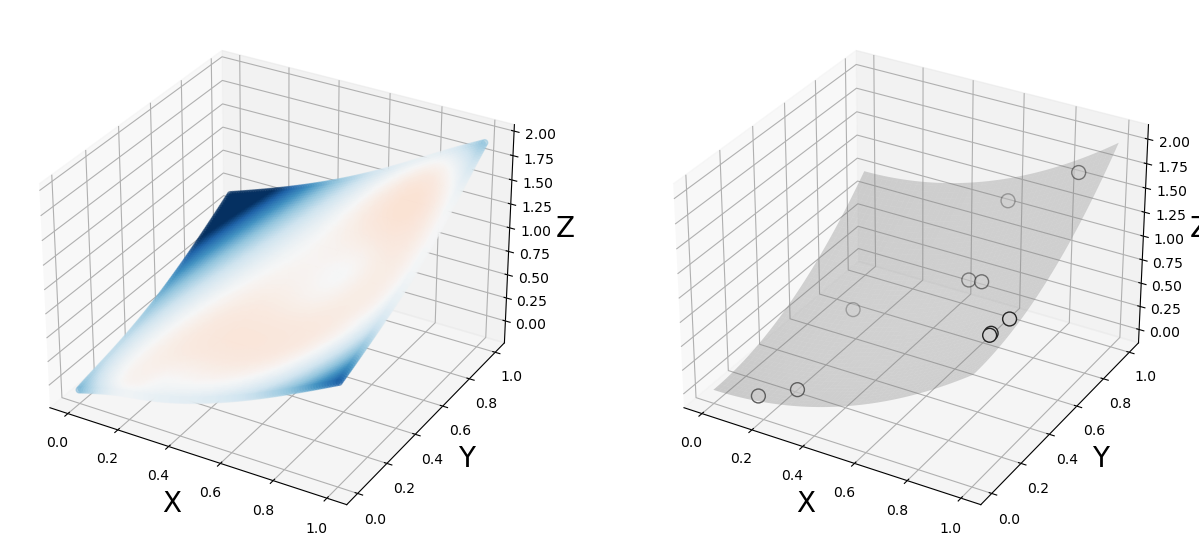

In [10]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(121, projection='3d')
im = ax.scatter(x,y,results,  c=results-z, alpha=.5, vmin=-.2, vmax=.2, cmap = 'RdBu_r')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xp, yp, zp, alpha=.3, color='grey')
#ax1.scatter(x,y,results, s=3, c='grey', alpha=.1, cmap = 'RdBu_r')
ax1.scatter(xi, yi, results[random_i], s = 100, c= results[random_i]-zi, 
            vmin = -.2, vmax = .2, edgecolor = 'black', zorder=3, cmap = 'RdBu_r')
ax1.set_xlabel('X', fontsize = 20)
ax1.set_ylabel('Y', fontsize = 20)
ax1.set_zlabel('Z', fontsize = 20)

- 2D Plots

Text(0.5, 1.0, 'Errors [RBF - Model]')

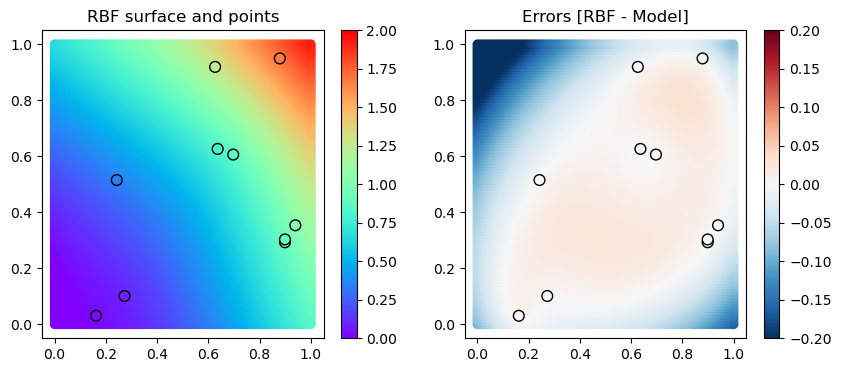

In [11]:
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(121)

im = ax0.scatter(x,y, c = results, vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
im1 = ax0.scatter(xi, yi, s = 60, c= zi, vmin = z.min(), vmax = z.max(), edgecolor = 'black', cmap = 'rainbow')
plt.colorbar(im, ax=ax0)
ax0.set_title('RBF surface and points')

ax1 = fig.add_subplot(122)
im = ax1.scatter(x,y, c = results-z, vmin=-.2, vmax=.2, cmap = 'RdBu_r')
im1 = ax1.scatter(xi, yi, s = 60, c= results[random_i]-zi, vmin = -.2, vmax=.2, edgecolor = 'black', cmap = 'RdBu_r')
plt.colorbar(im, ax = ax1)
ax1.set_title('Errors [RBF - Model]')

- Now, we choose a larger number of values

In [12]:
n_random = 30 #Number of random values to choosse

In [13]:
random_i = np.random.randint(0, len(x), size=n_random)
xi = x[random_i]
yi = y[random_i]
zi = z[random_i]

Text(0.5, 0.92, 'Selected Points for RBF')

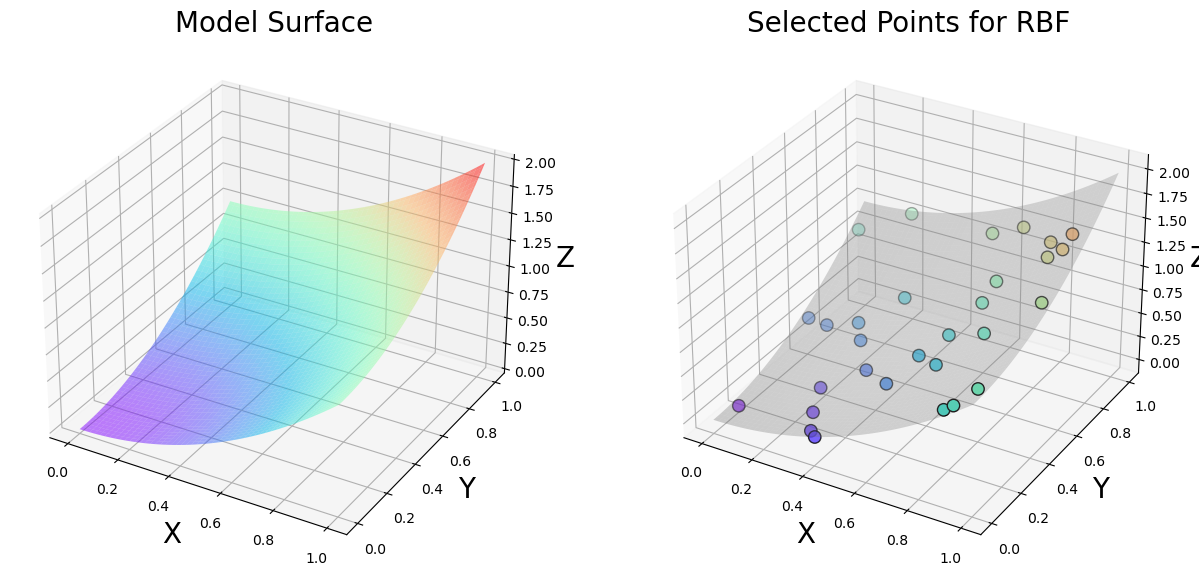

In [14]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xp,yp,zp,alpha=.5, cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('Model Surface', fontsize = 20)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xp, yp, zp, alpha=.3, color='grey')
#ax1.scatter(x,y,z, s=3, c='grey', alpha=.1, cmap = 'rainbow')
ax1.scatter(xi, yi, zi, s = 80, c= zi, vmin = z.min(), vmax = z.max(), edgecolor = 'black', zorder=3, cmap = 'rainbow')
ax1.set_xlabel('X', fontsize = 20)
ax1.set_ylabel('Y', fontsize = 20)
ax1.set_zlabel('Z', fontsize = 20)
ax1.set_title('Selected Points for RBF', fontsize = 20)


- 2D Plot of surface and selected points

Text(0, 0.5, 'Y')

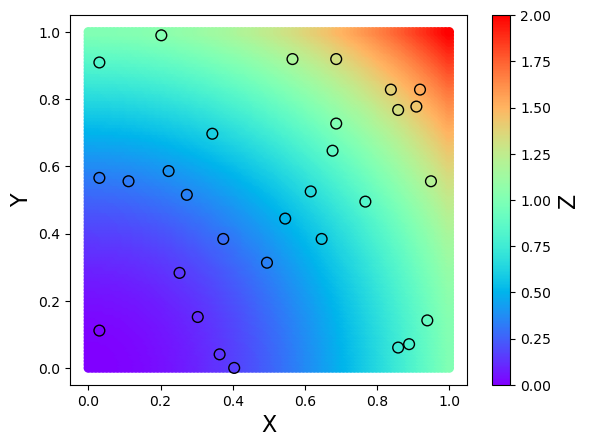

In [15]:
fig, ax = plt.subplots()
im = ax.scatter(x,y, c = z, vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
im1 = ax.scatter(xi, yi, s = 60, c= zi, vmin = z.min(), vmax = z.max(), 
                 edgecolor = 'black', cmap = 'rainbow')
plt.colorbar(im).set_label('Z', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('Y', fontsize = 16)

- Once we have selected the points, we fit the RBF function

In [16]:
rbf_func = RBFInterpolator(np.vstack((xi, yi)).T, zi)  # radial basis function interpolator instance

- With the RBF function (rbf_func) we obtain the results for all the combinations of x and y

In [17]:
results = rbf_func(np.vstack((x, y)).T)

- Once we have obtained the results we can plot the resulting surface

Text(0.5, 0.92, 'RBF resulting surface')

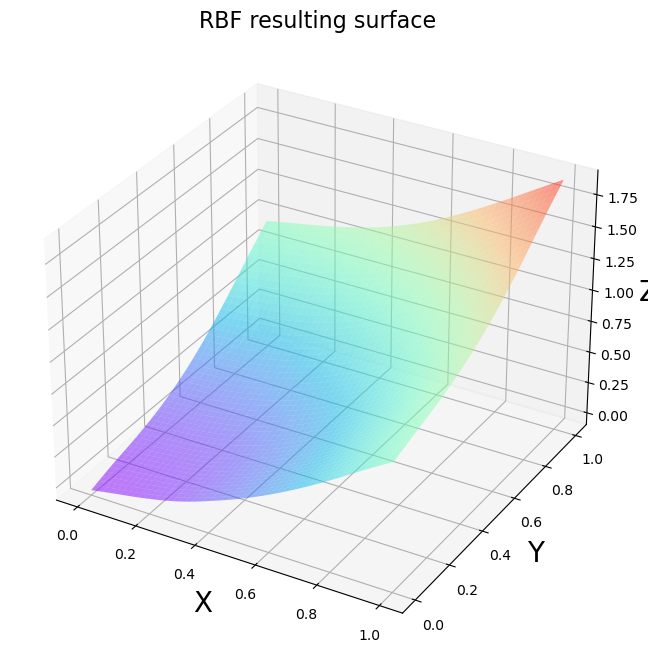

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xp, yp, np.reshape(results, np.shape(xp)), alpha=.5,
                vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('RBF resulting surface', fontsize = 16)

- We can also plot the errors over the surface

Text(0.5, 0, 'Z')

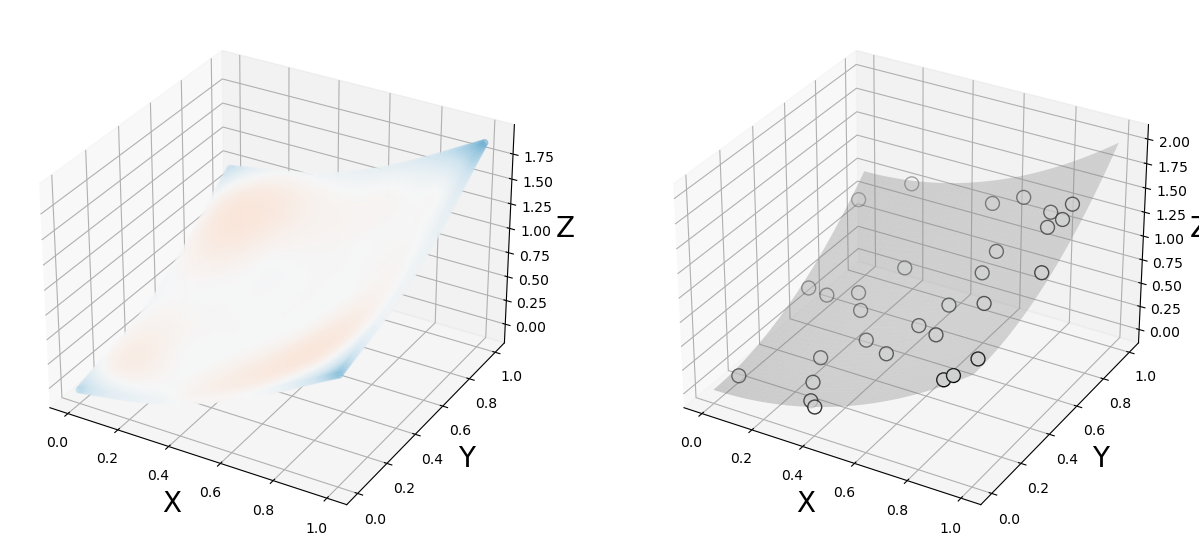

In [19]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(121, projection='3d')
im = ax.scatter(x,y,results,  c=results-z, alpha=.5, vmin=-.2, vmax=.2, cmap = 'RdBu_r')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xp, yp, zp, alpha=.3, color='grey')
#ax1.scatter(x,y,results, s=3, c='grey', alpha=.1, cmap = 'RdBu_r')
ax1.scatter(xi, yi, results[random_i], s = 100, c= results[random_i]-zi, 
            vmin = -.2, vmax = .2, edgecolor = 'black', zorder=3, cmap = 'RdBu_r')
ax1.set_xlabel('X', fontsize = 20)
ax1.set_ylabel('Y', fontsize = 20)
ax1.set_zlabel('Z', fontsize = 20)

- 2D Plots

Text(0.5, 1.0, 'Errors [RBF - Model]')

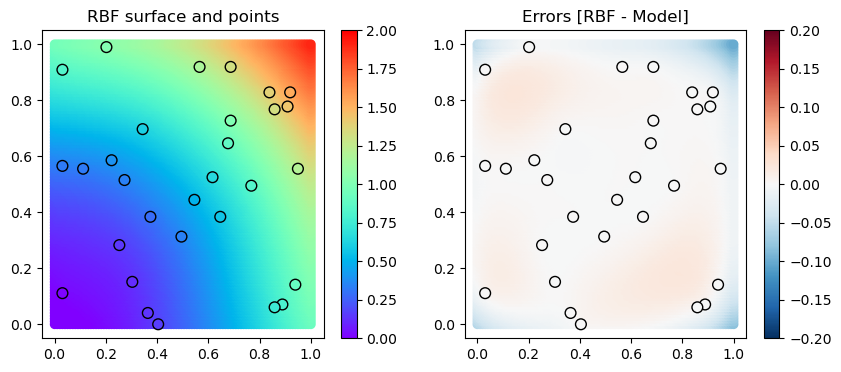

In [20]:
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(121)

im = ax0.scatter(x,y, c = results, vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
im1 = ax0.scatter(xi, yi, s = 60, c= zi, vmin = z.min(), vmax = z.max(), edgecolor = 'black', cmap = 'rainbow')
plt.colorbar(im, ax=ax0)
ax0.set_title('RBF surface and points')

ax1 = fig.add_subplot(122)
im = ax1.scatter(x,y, c = results-z, vmin=-.2, vmax=.2, cmap = 'RdBu_r')
im1 = ax1.scatter(xi, yi, s = 60, c= results[random_i]-zi, vmin = -.2, vmax=.2, edgecolor = 'black', cmap = 'RdBu_r')
plt.colorbar(im, ax = ax1)
ax1.set_title('Errors [RBF - Model]')

## Mexican Hat

 $$\textbf{Model: } z = sin(sqrt(x^2 + y^2)) / sqrt((x^2 + y^2))$$

In [21]:
n_disc = 1000

In [22]:
xp, yp = np.meshgrid(np.linspace(-8,8,n_disc), np.linspace(-8,8,n_disc)) #matrix
x, y = xp.reshape(-1), yp.reshape(-1) #vectors
rmat = np.sqrt ( x**2 + y**2) 
z = np.sin ( rmat ) / rmat #vector
zp = np.reshape(z, np.shape(xp)) #matrix

- Select a Random number of values

- First we are going to make a test with a reduced number of values

In [23]:
n_random = 100 #Number of random values to choosse

In [24]:
random_i = np.random.randint(0, len(x), size=n_random)
xi = x[random_i]
yi = y[random_i]
zi = z[random_i]

Text(0.5, 0.92, 'Selected Points for RBF')

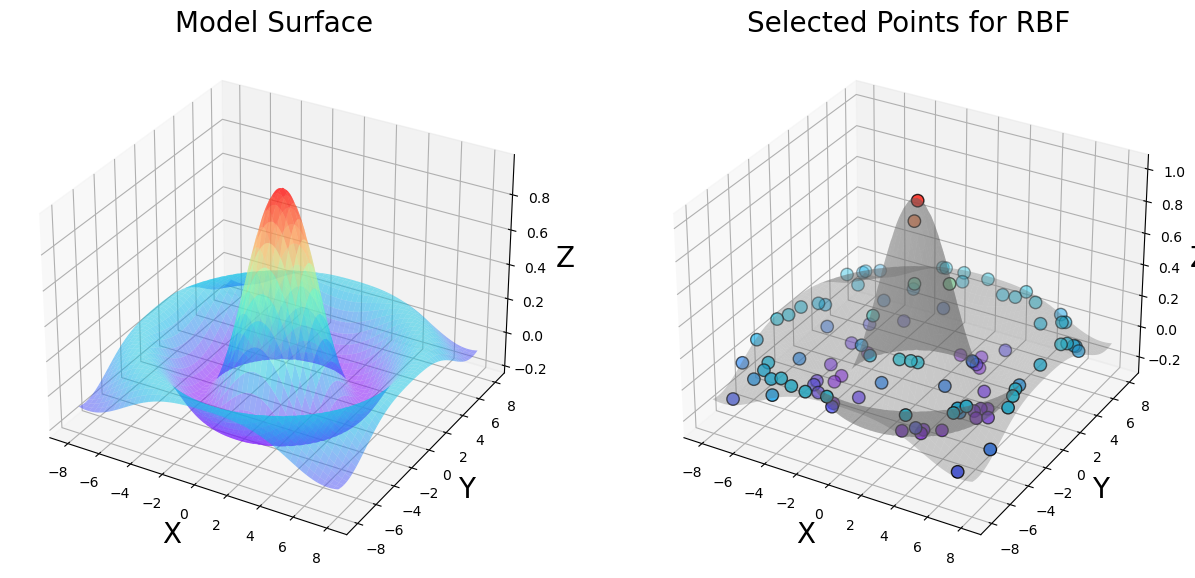

In [25]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xp,yp,zp,alpha=.5, cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('Model Surface', fontsize = 20)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xp, yp, zp, alpha=.3, color='grey')
#ax1.scatter(x,y,z, s=3, c='grey', alpha=.1, cmap = 'rainbow')
ax1.scatter(xi, yi, zi, s = 80, c= zi, vmin = z.min(), vmax = z.max(), edgecolor = 'black', zorder=3, cmap = 'rainbow')
ax1.set_xlabel('X', fontsize = 20)
ax1.set_ylabel('Y', fontsize = 20)
ax1.set_zlabel('Z', fontsize = 20)
ax1.set_title('Selected Points for RBF', fontsize = 20)


- 2D Plot of surface and selected points

Text(0, 0.5, 'Y')

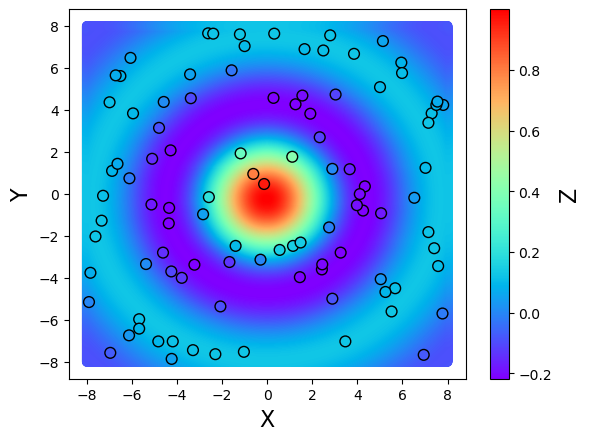

In [26]:
fig, ax = plt.subplots()
im = ax.scatter(x,y, c = z, vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
im1 = ax.scatter(xi, yi, s = 60, c= zi, vmin = z.min(), vmax = z.max(), 
                 edgecolor = 'black', cmap = 'rainbow')
plt.colorbar(im).set_label('Z', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('Y', fontsize = 16)

- Once we have selected the points, we fit the RBF function

In [27]:
rbf_func = RBFInterpolator(np.vstack((xi, yi)).T, zi)  # radial basis function interpolator instance

- With the RBF function (rbf_func) we obtain the results for all the combinations of x and y

In [28]:
results = rbf_func(np.vstack((x, y)).T)

- Once we have obtained the results we can plot the resulting surface

Text(0.5, 0.92, 'RBF resulting surface')

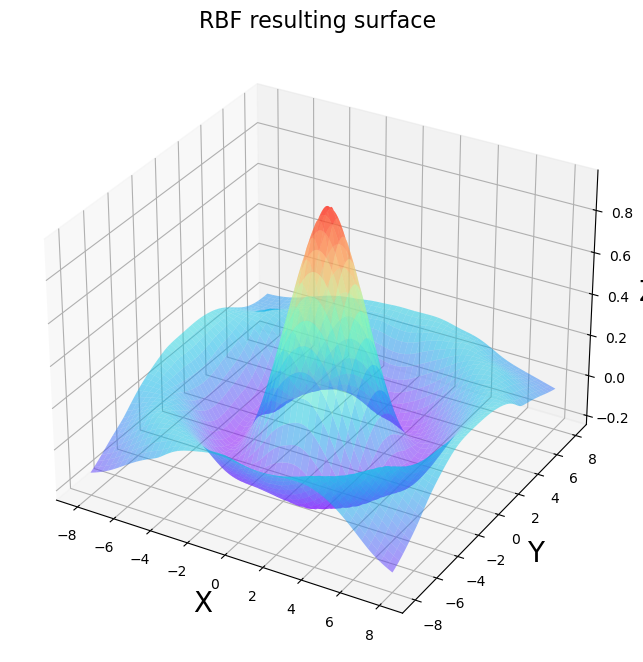

In [29]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xp, yp, np.reshape(results, np.shape(xp)), alpha=.5,
                vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('RBF resulting surface', fontsize = 16)

- We can also plot the errors over the surface

Text(0.5, 0, 'Z')

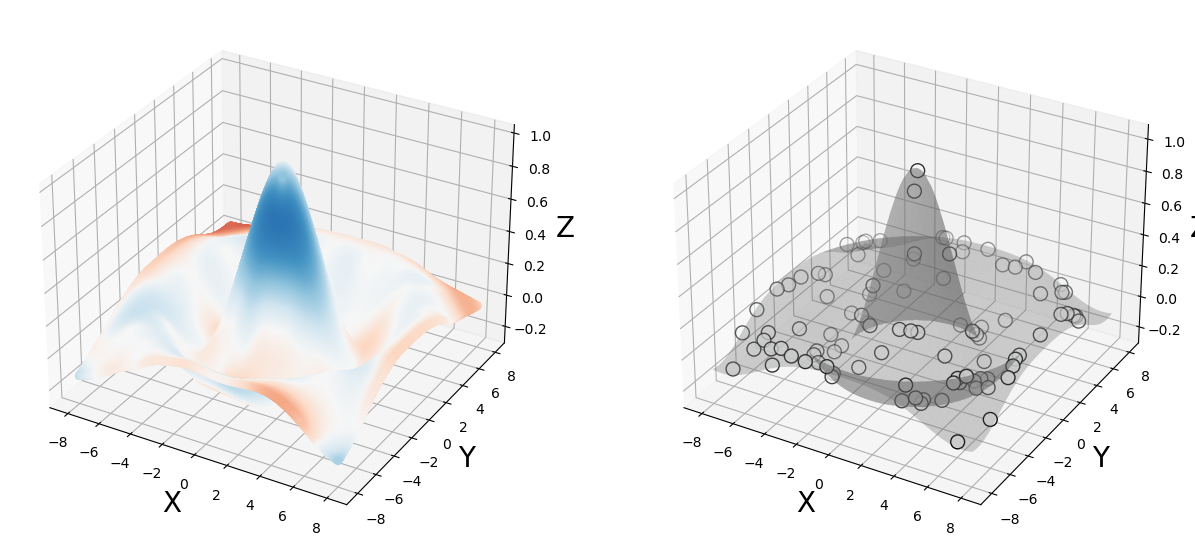

In [30]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(121, projection='3d')
im = ax.scatter(x,y,results,  c=results-z, alpha=.5, vmin=-.2, vmax=.2, cmap = 'RdBu_r')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xp, yp, zp, alpha=.3, color='grey')
#ax1.scatter(x,y,results, s=3, c='grey', alpha=.1, cmap = 'RdBu_r')
ax1.scatter(xi, yi, results[random_i], s = 100, c= results[random_i]-zi, 
            vmin = -.2, vmax = .2, edgecolor = 'black', zorder=3, cmap = 'RdBu_r')
ax1.set_xlabel('X', fontsize = 20)
ax1.set_ylabel('Y', fontsize = 20)
ax1.set_zlabel('Z', fontsize = 20)

- 2D Plots

Text(0.5, 1.0, 'Errors [RBF - Model]')

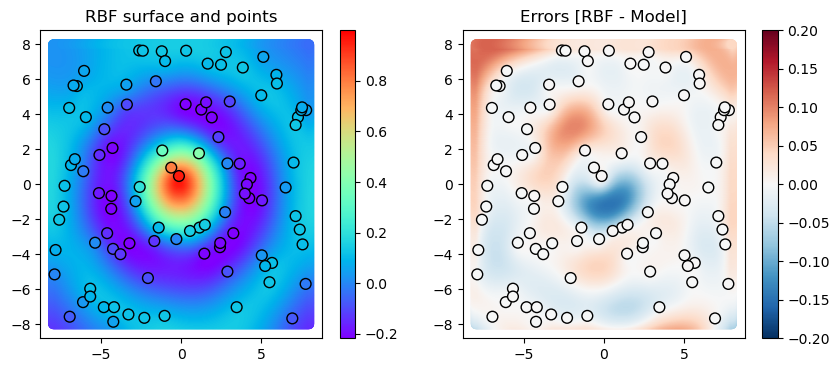

In [31]:
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(121)

im = ax0.scatter(x,y, c = results, vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
im1 = ax0.scatter(xi, yi, s = 60, c= zi, vmin = z.min(), vmax = z.max(), edgecolor = 'black', cmap = 'rainbow')
plt.colorbar(im, ax=ax0)
ax0.set_title('RBF surface and points')

ax1 = fig.add_subplot(122)
im = ax1.scatter(x,y, c = results-z, vmin=-.2, vmax=.2, cmap = 'RdBu_r')
im1 = ax1.scatter(xi, yi, s = 60, c= results[random_i]-zi, vmin = -.2, vmax=.2, edgecolor = 'black', cmap = 'RdBu_r')
plt.colorbar(im, ax = ax1)
ax1.set_title('Errors [RBF - Model]')

- First we are going to make a test with a larger number of values

In [32]:
n_random = 200 #Number of random values to choosse

In [33]:
random_i = np.random.randint(0, len(x), size=n_random)
xi = x[random_i]
yi = y[random_i]
zi = z[random_i]

Text(0.5, 0.92, 'Selected Points for RBF')

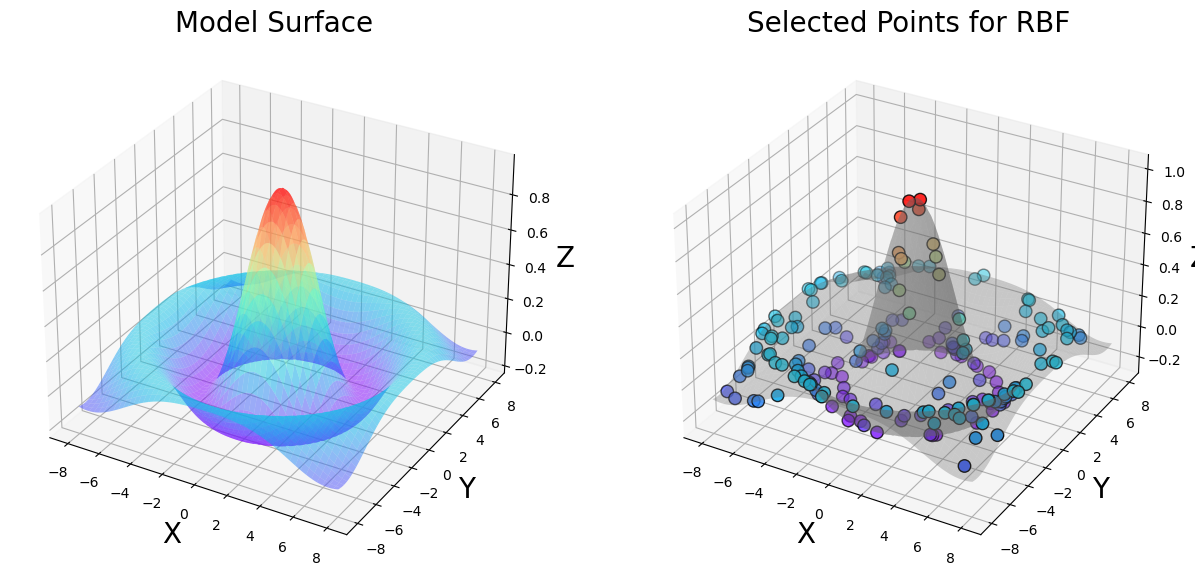

In [34]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xp,yp,zp,alpha=.5, cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('Model Surface', fontsize = 20)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xp, yp, zp, alpha=.3, color='grey')
#ax1.scatter(x,y,z, s=3, c='grey', alpha=.1, cmap = 'rainbow')
ax1.scatter(xi, yi, zi, s = 80, c= zi, vmin = z.min(), vmax = z.max(), edgecolor = 'black', zorder=3, cmap = 'rainbow')
ax1.set_xlabel('X', fontsize = 20)
ax1.set_ylabel('Y', fontsize = 20)
ax1.set_zlabel('Z', fontsize = 20)
ax1.set_title('Selected Points for RBF', fontsize = 20)


- 2D Plot of surface and selected points

Text(0, 0.5, 'Y')

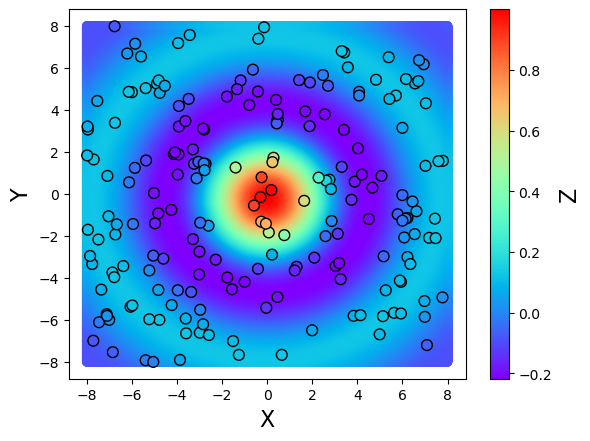

In [35]:
fig, ax = plt.subplots()
im = ax.scatter(x,y, c = z, vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
im1 = ax.scatter(xi, yi, s = 60, c= zi, vmin = z.min(), vmax = z.max(), 
                 edgecolor = 'black', cmap = 'rainbow')
plt.colorbar(im).set_label('Z', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('Y', fontsize = 16)

- Once we have selected the points, we fit the RBF function

In [36]:
rbf_func = RBFInterpolator(np.vstack((xi, yi)).T, zi)  # radial basis function interpolator instance

- With the RBF function (rbf_func) we obtain the results for all the combinations of x and y

In [37]:
results = rbf_func(np.vstack((x, y)).T)

- Once we have obtained the results we can plot the resulting surface

Text(0.5, 0.92, 'RBF resulting surface')

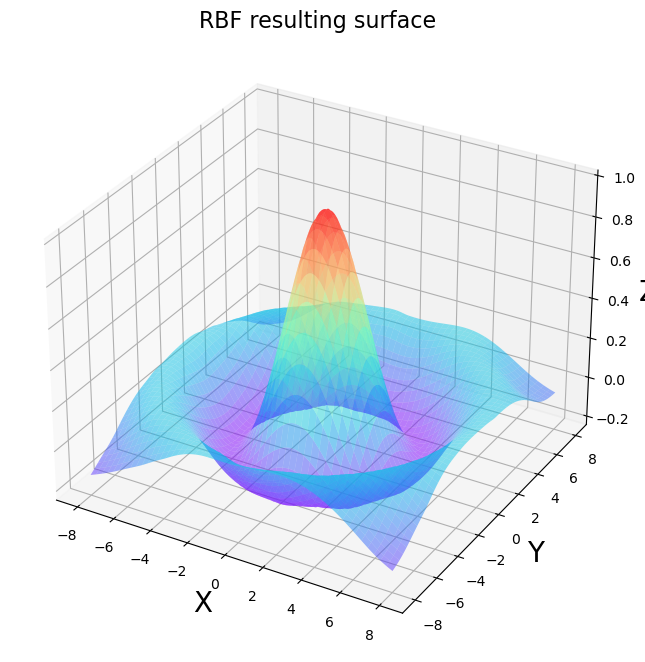

In [38]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xp, yp, np.reshape(results, np.shape(xp)), alpha=.5,
                vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('RBF resulting surface', fontsize = 16)

- We can also plot the errors over the surface

Text(0.5, 0, 'Z')

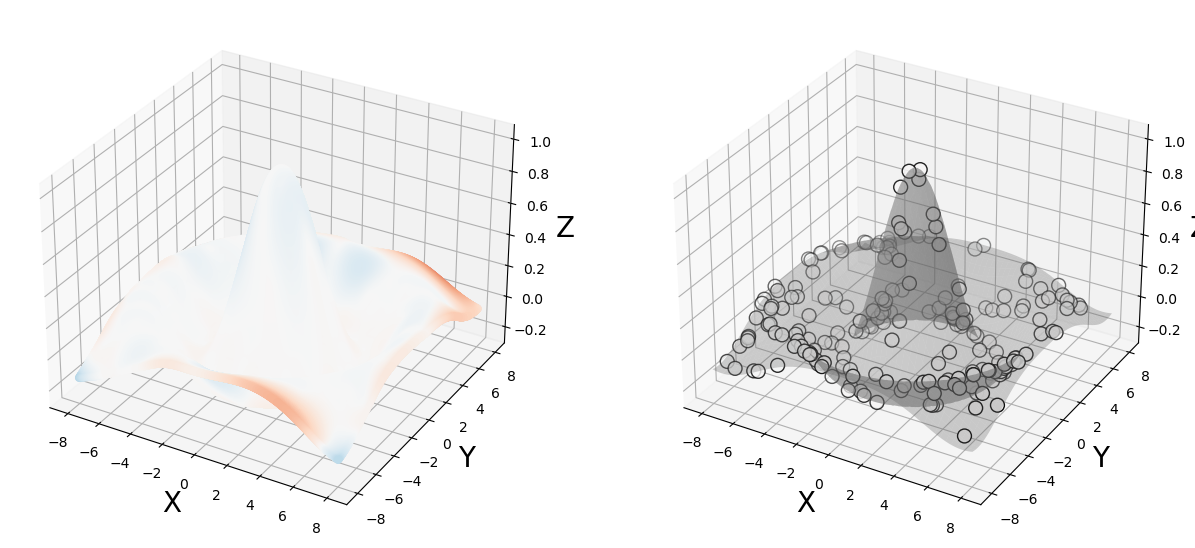

In [39]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(121, projection='3d')
im = ax.scatter(x,y,results,  c=results-z, alpha=.5, vmin=-.2, vmax=.2, cmap = 'RdBu_r')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xp, yp, zp, alpha=.3, color='grey')
#ax1.scatter(x,y,results, s=3, c='grey', alpha=.1, cmap = 'RdBu_r')
ax1.scatter(xi, yi, results[random_i], s = 100, c= results[random_i]-zi, 
            vmin = -.2, vmax = .2, edgecolor = 'black', zorder=3, cmap = 'RdBu_r')
ax1.set_xlabel('X', fontsize = 20)
ax1.set_ylabel('Y', fontsize = 20)
ax1.set_zlabel('Z', fontsize = 20)

- 2D Plots

Text(0.5, 1.0, 'Errors [RBF - Model]')

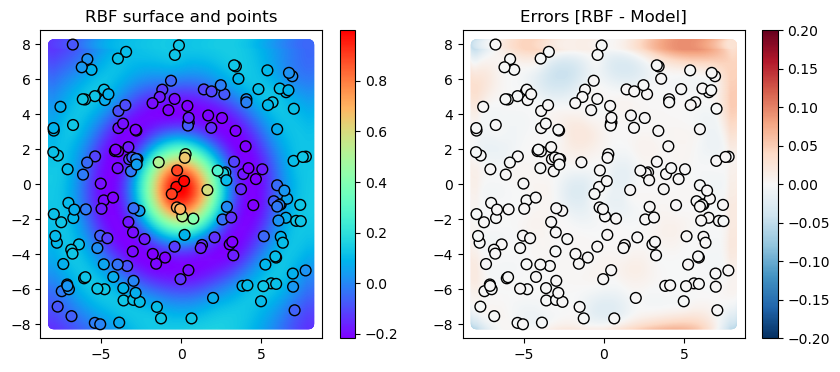

In [40]:
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(121)

im = ax0.scatter(x,y, c = results, vmin = z.min(), vmax = z.max(), cmap = 'rainbow')
im1 = ax0.scatter(xi, yi, s = 60, c= zi, vmin = z.min(), vmax = z.max(), edgecolor = 'black', cmap = 'rainbow')
plt.colorbar(im, ax=ax0)
ax0.set_title('RBF surface and points')

ax1 = fig.add_subplot(122)
im = ax1.scatter(x,y, c = results-z, vmin=-.2, vmax=.2, cmap = 'RdBu_r')
im1 = ax1.scatter(xi, yi, s = 60, c= results[random_i]-zi, vmin = -.2, vmax=.2, edgecolor = 'black', cmap = 'RdBu_r')
plt.colorbar(im, ax = ax1)
ax1.set_title('Errors [RBF - Model]')

## Optimal Number of Clusters

In [41]:
random = np.linspace(10, 250, 30).astype('int')
random

array([ 10,  18,  26,  34,  43,  51,  59,  67,  76,  84,  92, 101, 109,
       117, 125, 134, 142, 150, 158, 167, 175, 183, 192, 200, 208, 216,
       225, 233, 241, 250])

In [42]:
random = np.linspace(10, 250, 30).astype('int')
print(random)
RMSE = []

for n_random in random:
    
    random_i = np.random.randint(0, len(x), size=n_random)
    xi = x[random_i]
    yi = y[random_i]
    zi = z[random_i]
    rbf_func = RBFInterpolator(np.vstack((xi, yi)).T, zi)  # radial basis function interpolator instance
    
    results = rbf_func(np.vstack((x, y)).T)
    
    RMSE.append(np.sqrt(np.sum((results-z)**2)))
    

[ 10  18  26  34  43  51  59  67  76  84  92 101 109 117 125 134 142 150
 158 167 175 183 192 200 208 216 225 233 241 250]


Text(0, 0.5, 'RMSE')

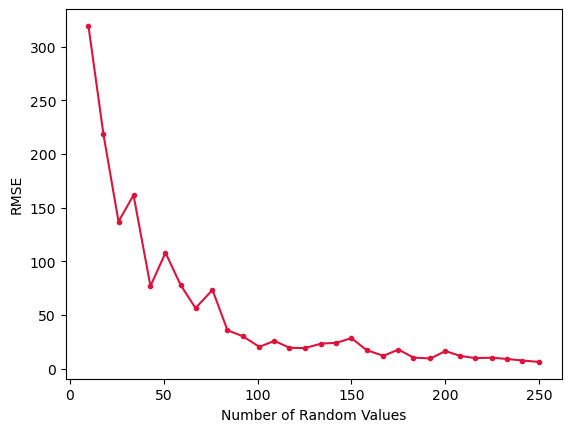

In [43]:
plt.plot(random, RMSE, '.-' ,color = 'crimson')
plt.xlabel('Number of Random Values')
plt.ylabel('RMSE')